In [1]:
import pandas as pd

In [114]:
mos_data = pd.read_csv('./train.csv')
mos_data

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8447,2013-09-26,"5100 West 72nd Street, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,51,W 72ND ST,T035,"5100 W 72ND ST, Chicago, IL",41.763733,-87.742302,8,6,1
8448,2013-09-26,"5800 North Ridge Avenue, Chicago, IL 60660, USA",CULEX PIPIENS/RESTUANS,58,N RIDGE AVE,T231,"5800 N RIDGE AVE, Chicago, IL",41.987280,-87.666066,8,5,0
8449,2013-09-26,"1700 North Ashland Avenue, Chicago, IL 60622, USA",CULEX PIPIENS/RESTUANS,17,N ASHLAND AVE,T232,"1700 N ASHLAND AVE, Chicago, IL",41.912563,-87.668055,9,1,0
8450,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,71,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9,5,0


In [206]:
import matplotlib.pyplot as plt
import numpy as np

# Шукаємо співвідношення між різними показниками
# можливо додати розподіл по медіані

# 2.1 Заражені види за адресою?
# 4. Шукаємо співвідношення між точністю адреси і розташуванням на карті?


In [207]:



#mos_data['NewAddress'] = np.where(mos_data['Address'].duplicated(), sum(mos_data['NumMosquitos'].where(mos_data['Address'].duplicated())), mos_data['NumMosquitos'])
#mos_data
# mos_data[[x for x in mos_data if mos_data['Address'].duplicated() sum(mos_data['NumMosquitos']) ]]
# mos_data.drop_duplicates(['Address'], inplace=True)

In [252]:
# 1. Співвідношення між адресою і кількістю заражених комарів

mos_data_grouped_by_address = mos_data.groupby(by=['Address']).agg(
    NumMosquitos=('NumMosquitos', 'sum'),
    WnvPresent=('WnvPresent', 'max')
)
mos_data_grouped_by_address


,NumMosquitos,WnvPresent
Address,,
"1000 East 67th Street, Chicago, IL 60637, USA",655,1
"1000 North Central Park Avenue, Chicago, IL 60651, USA",1684,1
"1000 South California Avenue, Chicago, IL 60612, USA",125,0
"1000 West 95th Street, Chicago, IL 60643, USA",185,1
"1100 North Artesian Avenue, Chicago, IL 60622, USA",370,1
...,...,...
"South Vincennes Avenue, Chicago, IL, USA",327,1
"South Wallace Street, Chicago, IL, USA",28,0
"University of Illinois at Chicago, 1100 South Ashland Avenue, Chicago, IL 60607, USA",1339,1


<AxesSubplot: xlabel='WnvPresent', ylabel='NumMosquitos'>

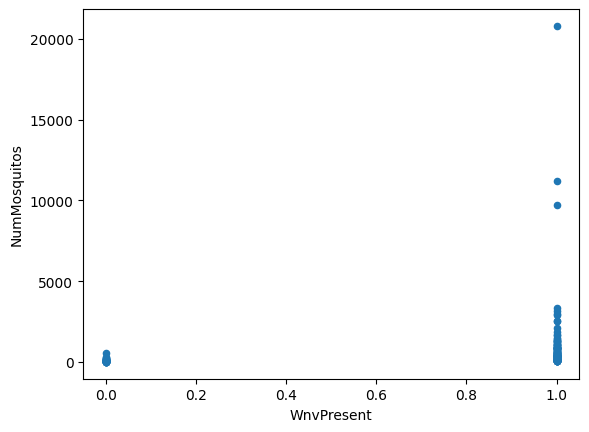

In [176]:
# 1.1 Візуалізація співвідношення кількості заражених комарів до незаражених

mos_data_grouped_by_address.plot.scatter(x='WnvPresent', y='NumMosquitos')

In [245]:
# 2. Співвідношення між видом і кількістю заражених комарів

mos_data_grouped_by_species = mos_data.groupby(by=['Species']).agg(
    NumMosquitos=('NumMosquitos', 'sum'),
    WnvPresent=('WnvPresent', 'max')
).sort_values(by='NumMosquitos')
mos_data_grouped_by_species


,NumMosquitos,WnvPresent
Species,,
CULEX TARSALIS,2,0
CULEX ERRATICUS,7,0
CULEX SALINARIUS,91,0
CULEX TERRITANS,380,0
CULEX RESTUANS,17363,1
CULEX PIPIENS,43335,1
CULEX PIPIENS/RESTUANS,55062,1


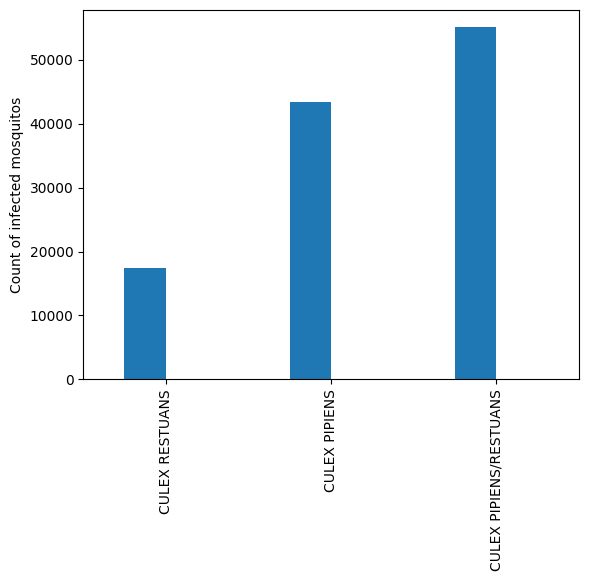

In [246]:
# 2.1. Візуалізація кількості заражених комарів

sp_plot = mos_data_grouped_by_species[mos_data_grouped_by_species['WnvPresent'] == 1].plot.bar()
plt.ylabel('Count of infected mosquitos')
sp_plot.set(xlabel=None)
sp_plot.legend().remove()

In [278]:
# Формуємо вибірку для візуалізації на карті

mos_data_grouped_map = mos_data.groupby(by=['Address']).agg(
    NumMosquitos=('NumMosquitos', 'sum'),
    WnvPresent=('WnvPresent', 'max'),
    Latitude=('Latitude', 'first'),
    Longitude=('Longitude', 'first')
).sort_values(by='NumMosquitos')
mos_data_grouped_map = mos_data_grouped_map[mos_data_grouped_map['WnvPresent'] == 1]
mos_data_grouped_map

,NumMosquitos,WnvPresent,Latitude,Longitude
Address,,,,
"6000 West Roscoe Street, Chicago, IL 60634, USA",50,1,41.942114,-87.776385
"4200 West 31st Street, Chicago, IL 60623, USA",52,1,41.837085,-87.729384
"4000 North Austin Avenue, Chicago, IL 60634, USA",58,1,41.953067,-87.776792
"6600 South Kilpatrick Avenue, Chicago, IL 60629, USA",61,1,41.772846,-87.740029
"6400 South Stony Island Avenue, Chicago, IL 60637, USA",61,1,41.778748,-87.586427
...,...,...,...,...
"2400 East 105th Street, Chicago, IL 60617, USA",3130,1,41.704572,-87.565666
"4100 North Oak Park Avenue, Chicago, IL 60634, USA",3350,1,41.954690,-87.800991
"South Stony Island Avenue, Chicago, IL, USA",9694,1,41.726465,-87.585413


In [284]:
# 3. Візуалізуємо локацї, де знайдено скупчення заражених комарів

import folium
from folium import plugins

vis = folium.Map(location=[mos_data_grouped_map['Latitude'][1], mos_data_grouped_map['Longitude'][1]], zoom_start=8)
locations = mos_data_grouped_map[['Latitude', 'Longitude']].values.tolist()

for point in range(0, len(locations)):
    folium.Circle(locations[point], popup=mos_data_grouped_map['NumMosquitos'][point]).add_to(vis)

heatData = mos_data_grouped_map.groupby(by=['Latitude', 'Longitude'])['NumMosquitos'].mean().reset_index().values.tolist()
folium.plugins.HeatMap(heatData).add_to(vis)
vis

In [ ]:
# 5. Додаємо дані про погоду з таблички weather до нашої вибірки

In [ ]:
# 6. Додаємо дані про розпилення з таблички spray до нашої вибірки

In [ ]:
# 7. Вибираємо модель для навчання
# 7.1. Тренуємо модель на основі даних для тренування
# 7.2. Тестуємо модель на основі даних для тестування